# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay


In [4]:
dados_clientes = pd.read_csv('demo01_dummy-MOD07.csv')
dados_clientes.head(2)

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,58.832877,3.106849,1,0,0,0,2.0,False,...,True,False,False,False,False,True,False,False,False,False
1,1,0,52.356164,8.358904,1,0,1,1,1.0,False,...,False,False,True,False,False,True,False,False,False,False


In [39]:
dados_clientes.shape

(6770, 34)

In [8]:
dados_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              6770 non-null   int64  
 1   qtd_filhos                              6770 non-null   int64  
 2   idade                                   6770 non-null   float64
 3   tempo_emprego                           6770 non-null   float64
 4   possui_celular                          6770 non-null   int64  
 5   possui_fone_comercial                   6770 non-null   int64  
 6   possui_fone                             6770 non-null   int64  
 7   possui_email                            6770 non-null   int64  
 8   qt_pessoas_residencia                   6770 non-null   float64
 9   mau                                     6770 non-null   bool   
 10  sexo_M                                  6770 non-null   bool

In [41]:
dados_clientes.tail()

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
6765,6765,1,34.857534,3.101370,1,1,1,0,1.0,True,...,False,False,True,False,False,True,False,False,False,False
6766,6766,0,54.109589,9.884932,1,0,0,0,2.0,True,...,False,False,False,False,False,True,False,False,False,False
6767,6767,0,43.389041,7.380822,1,1,1,0,2.0,True,...,True,False,False,False,False,True,False,False,False,False
6768,6768,0,30.005479,9.800000,1,1,0,0,2.0,True,...,True,False,False,False,False,True,False,False,False,False
6769,6769,0,33.936986,3.630137,1,0,1,1,2.0,True,...,True,False,False,False,False,True,False,False,False,False


In [5]:
x = dados_clientes.drop("mau", axis=1)
y = dados_clientes.mau

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=99)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [44]:
# 1. Defina um objeto com a função da árvore de decisão vista em aula.

demo = DecisionTreeClassifier(random_state=99)
demo

DecisionTreeClassifier(random_state=99)

In [54]:
# 2. Treine o modelo com os dados que você separou para treinamento.
demo = demo.fit(x_train,y_train)
demo

DecisionTreeClassifier(random_state=99)

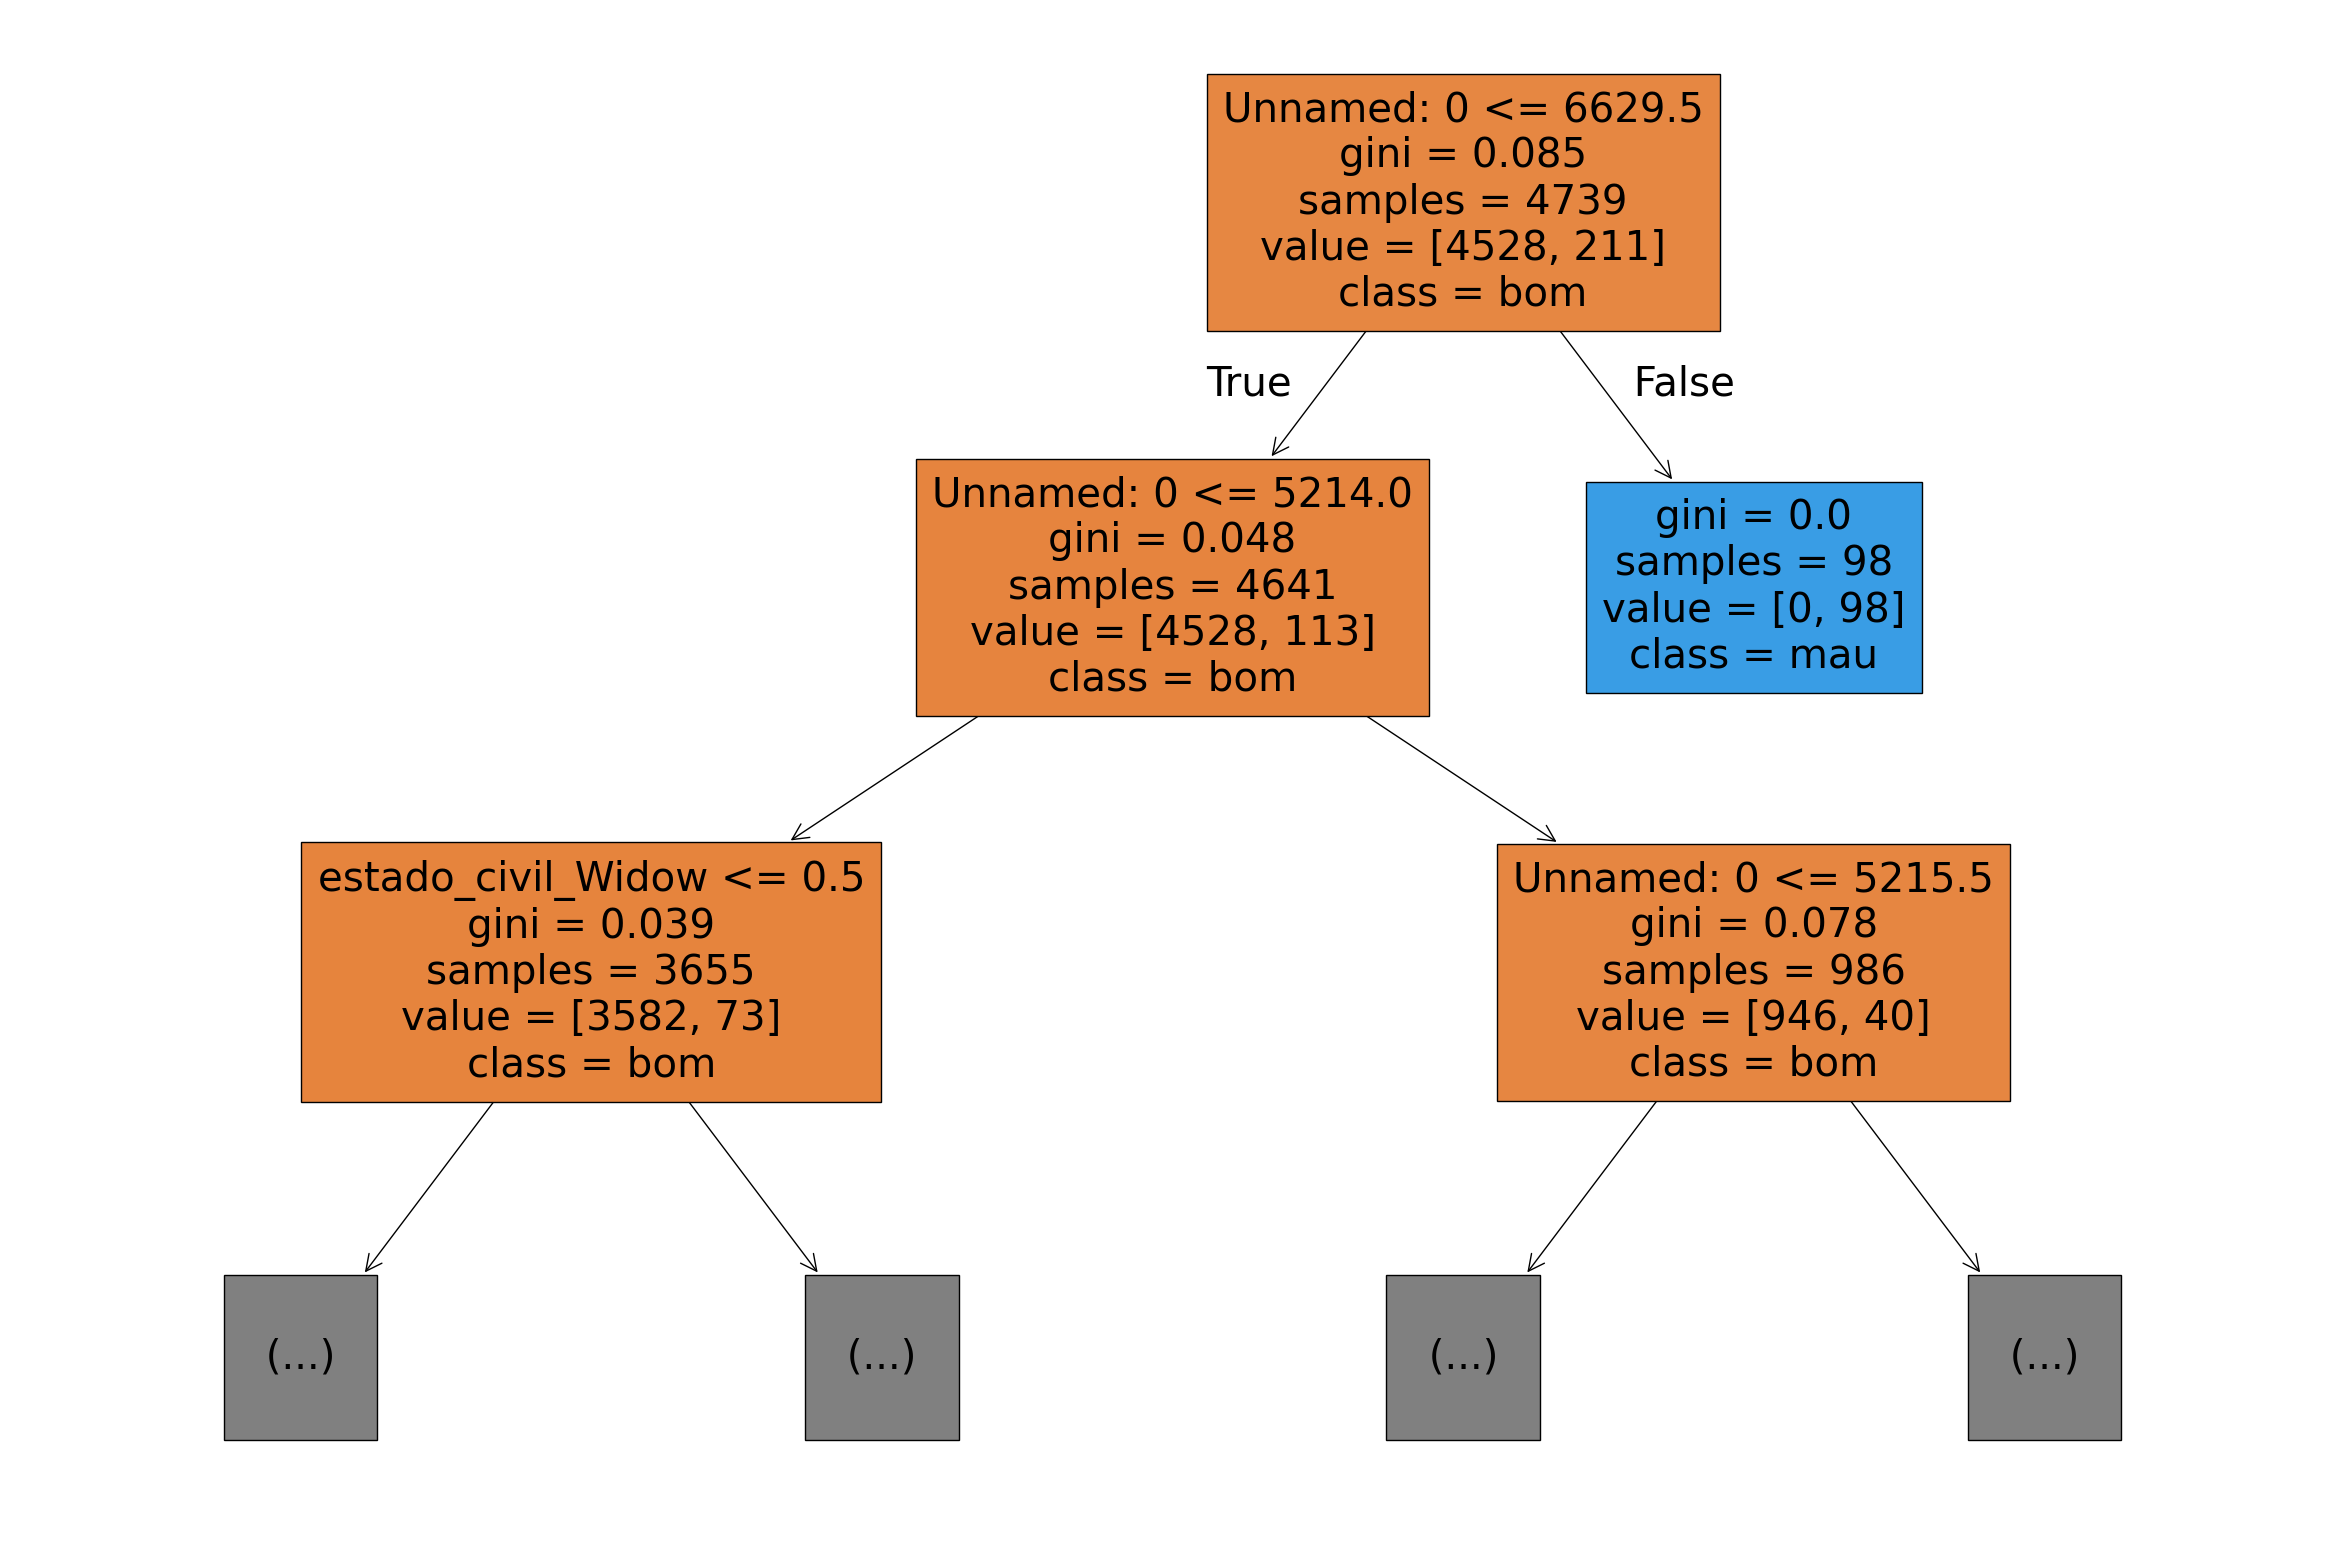

In [57]:
# 3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.

plt.figure(figsize=(30, 20))
plot_tree(demo,
          filled=True,
          class_names=['bom', 'mau'],
          feature_names=list(x.columns),
          max_depth=2)
plt.show()

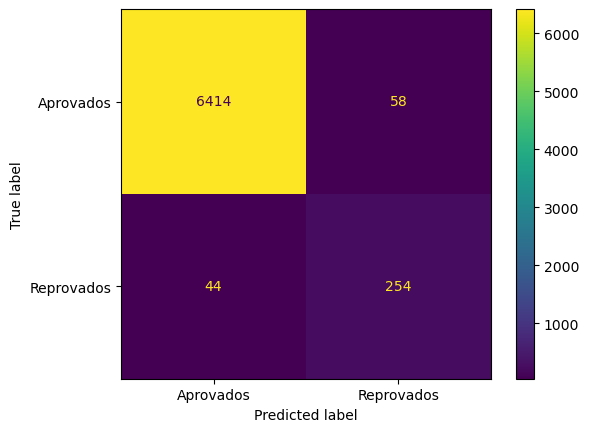

In [56]:
# 4. Produza uma visualização da matriz de classificação (ou matriz de confusão) 
#    - coloque os rótulos como "aprovados" e "reprovados"
#       - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.

preditos = demo.predict(x)
cm = confusion_matrix(y, preditos, labels=demo.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
MatrizDeConfusao.plot()

In [52]:
# 5. Calcule a acurácia na base de treinamento

acuracia_treino = accuracy_score(y_train, demo.predict(x_train))
acuracia_treino

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [63]:
# 1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.

y_predict_test = demo.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)

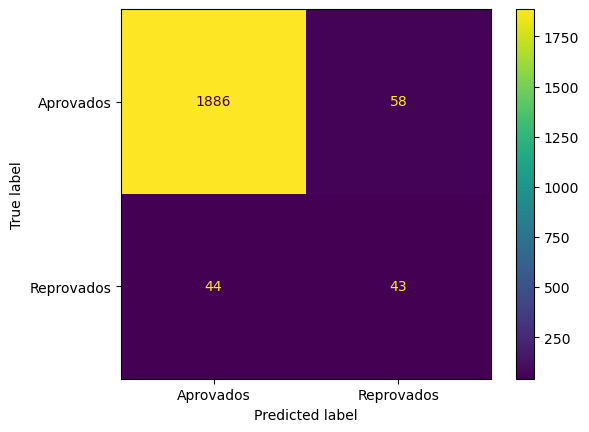

In [64]:
# 2. Produza a visualização da matriz de confusão para a base de teste.

disp_test = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
disp_test.plot()

In [72]:
# 3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.

# Calcular a acurácia no conjunto de validação (base de teste)
val_accuracy = accuracy_score(y_test, y_predict_test)
val_accuracy


# Calcular a acurácia no conjunto de treinamento
train_accuracy = accuracy_score(y_train, demo.predict(y_train))
train_accuracy

c:\Users\Lucas\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

accuracy_score (Test 2): 0.9497784342688331%
Dos 2031 dados existentes no y_test, 101 foram classificados como "mau" neste novo teste.

Proporção de  "maus": 4.97%


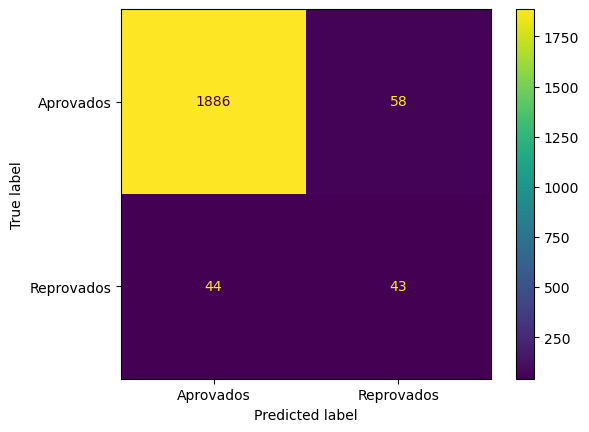

In [74]:
# 4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. 
# Use o random_state = 123. 
# Avalie a matriz de classificação. 
# Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?

demo2 = DecisionTreeClassifier(min_samples_leaf=5, max_depth=100, random_state=123)
demo2 = demo2.fit(x_train, y_train)
y_predict_test2 = demo.predict(x_test)
cm2 = confusion_matrix(y_test, y_predict_test2)
disp_test2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['Aprovados', 'Reprovados'])
disp_test2.plot()
print(f'accuracy_score (Test 2): {accuracy_score(y_test, y_predict_test2)}%')
print(f'Dos {y_test.count()} dados existentes no y_test, {y_predict_test2.sum()} foram classificados como "mau" neste novo teste.\n')
print(f'Proporção de  "maus": {(y_predict_test2.sum()/y_test.count()*100).round(2)}%')

In [75]:
# 5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

print(f'\n accuracy_score (Se todos forem "bons"): {((cm2[0,0]+cm2[0,1])/y_test.count()*100).round(2)}%\n')


 accuracy_score (Se todos forem "bons"): 95.72%

